### EAE 598 - Jupyter Notebook: Applied Xarray Example

#### For this example, I will use ERA5 data from THREDDS that can be accessed here: https://rda.ucar.edu/datasets/d633000/

#### Import libraries

In [1]:
import xarray as xr
import metpy
from siphon.catalog import TDSCatalog

#### Define the variables and URLs in a dictionary to remotely download the ERA5 data

In [2]:
urls = {'temperature_pl': 'https://thredds.rda.ucar.edu/thredds/catalog/files/g/d633000/e5.oper.an.pl/201902/catalog.html?dataset=files/g/d633000/e5.oper.an.pl/201902/e5.oper.an.pl.128_130_t.ll025sc.2019021300_2019021323.nc', 
        'specific_humidity_pl': 'https://thredds.rda.ucar.edu/thredds/catalog/files/g/d633000/e5.oper.an.pl/201902/catalog.html?dataset=files/g/d633000/e5.oper.an.pl/201902/e5.oper.an.pl.128_133_q.ll025sc.2019021300_2019021323.nc'}

#### Iterate over the URLs and download the ERA5 data

In [3]:
datasets = {}

for var, url in urls.items():
    try:
        tds_catalog = TDSCatalog(url)
        ds_url = tds_catalog.datasets[0].access_urls['OPENDAP']
        ds = xr.open_dataset(ds_url).metpy.parse_cf()
        datasets[var] = ds
        print(f"Successfully loaded {var}")

    except Exception as e:
        print(f"Error loading {var}: {e}")

    try:
        ds_pl = xr.merge([datasets['temperature_pl'], datasets['specific_humidity_pl']])
        print("Successfully merged pressure level datasets")
    except KeyError as e:
        print(f"Error merging pressure level datasets: {e}")

C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://thredds.rda.ucar.edu/thredds/catalog/files/g/d633000/e5.oper.an.pl/201902/catalog.html?dataset=files/g/d633000/e5.oper.an.pl/201902/e5.oper.an.pl.128_130_t.ll025sc.2019021300_2019021323.nc returned HTML. Changing to: https://thredds.rda.ucar.edu/thredds/catalog/files/g/d633000/e5.oper.an.pl/201902/catalog.xml?dataset=files/g/d633000/e5.oper.an.pl/201902/e5.oper.an.pl.128_130_t.ll025sc.2019021300_2019021323.nc
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,
C:\Users\Tony\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Successfully loaded temperature_pl
Error merging pressure level datasets: 'specific_humidity_pl'


C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://thredds.rda.ucar.edu/thredds/catalog/files/g/d633000/e5.oper.an.pl/201902/catalog.html?dataset=files/g/d633000/e5.oper.an.pl/201902/e5.oper.an.pl.128_133_q.ll025sc.2019021300_2019021323.nc returned HTML. Changing to: https://thredds.rda.ucar.edu/thredds/catalog/files/g/d633000/e5.oper.an.pl/201902/catalog.xml?dataset=files/g/d633000/e5.oper.an.pl/201902/e5.oper.an.pl.128_133_q.ll025sc.2019021300_2019021323.nc
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,


Successfully loaded specific_humidity_pl
Successfully merged pressure level datasets


#### Let's investigate the merged dataset

In [4]:
ds_pl

<xarray.Dataset>
Dimensions:    (time: 24, latitude: 721, level: 37, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2019-02-13 ... 2019-02-13T23:00:00
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    metpy_crs  object Projection: latitude_longitude
Data variables:
    utc_date   (time) int32 2019021300 2019021301 ... 2019021322 2019021323
    T          (time, level, latitude, longitude) float32 ...
    Q          (time, level, latitude, longitude) float32 ...
Attributes:
    DATA_SOURCE:                     ECMWF: https://cds.climate.copernicus.eu...
    NETCDF_CONVERSION:               CISL RDA: Conversion from ECMWF GRIB 1 d...
    NETCDF_VERSION:                  4.6.3
    CONVERSION_PLATFORM:             Linux r9i2n12 4.12.14-94.41-default #1 S...
    CONVERSION_DATE:                 Tue Sep 10 17:07:15 MDT 2019
    Conventions:                     CF-1.6
    NETCDF_COMPRESSION:              NCO: Precision-preserving compression to...
    history:                         Tue Sep 10 17:07:34 2019: ncks -4 --ppc ...
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    DODS_EXTRA.Unlimited_Dimension:  time

#### It has four dimensions:
#### 1. Time
#### 2. Latitude
#### 3. Level (pressure levels)
#### 4. Longitude

#### And two variables:
#### 1. T: Temperature
#### 2. Q: Specific Humidity

#### Let's check out the temperature variable

In [5]:
ds_pl['T']

<xarray.DataArray 'T' (time: 24, level: 37, latitude: 721, longitude: 1440)>
[921957120 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2019-02-13 ... 2019-02-13T23:00:00
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    metpy_crs  object Projection: latitude_longitude
Attributes: (12/15)
    long_name:                     Temperature
    short_name:                    t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               130
    ...                            ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric pressure level analysis [...
    number_of_significant_digits:  7
    _ChunkSizes:                   [   1   37  721 1440]

#### Let's check out the attributes for the temperature variable

In [6]:
ds_pl['T'].attrs

{'long_name': 'Temperature',
 'short_name': 't',
 'units': 'K',
 'original_format': 'WMO GRIB 1 with ECMWF local table',
 'ecmwf_local_table': 128,
 'ecmwf_parameter': 130,
 'minimum_value': 179.16608,
 'maximum_value': 318.14484,
 'grid_specification': '0.25 degree x 0.25 degree from 90N to 90S and 0E to 359.75E (721 x 1440 Latitude/Longitude)',
 'rda_dataset': 'ds633.0',
 'rda_dataset_url': 'https:/rda.ucar.edu/datasets/ds633.0/',
 'rda_dataset_doi': 'DOI: 10.5065/BH6N-5N20',
 'rda_dataset_group': 'ERA5 atmospheric pressure level analysis [netCDF4]',
 'number_of_significant_digits': 7,
 '_ChunkSizes': array([   1,   37,  721, 1440])}

#### The metadata informs us that the units for temperature are Kelvins

In [7]:
temperature = ds_pl['T'] # units: K

#### Let's investigate the time and level dimensions

#### First the time dimension

In [8]:
temperature['time']

<xarray.DataArray 'time' (time: 24)>
array(['2019-02-13T00:00:00.000000000', '2019-02-13T01:00:00.000000000',
       '2019-02-13T02:00:00.000000000', '2019-02-13T03:00:00.000000000',
       '2019-02-13T04:00:00.000000000', '2019-02-13T05:00:00.000000000',
       '2019-02-13T06:00:00.000000000', '2019-02-13T07:00:00.000000000',
       '2019-02-13T08:00:00.000000000', '2019-02-13T09:00:00.000000000',
       '2019-02-13T10:00:00.000000000', '2019-02-13T11:00:00.000000000',
       '2019-02-13T12:00:00.000000000', '2019-02-13T13:00:00.000000000',
       '2019-02-13T14:00:00.000000000', '2019-02-13T15:00:00.000000000',
       '2019-02-13T16:00:00.000000000', '2019-02-13T17:00:00.000000000',
       '2019-02-13T18:00:00.000000000', '2019-02-13T19:00:00.000000000',
       '2019-02-13T20:00:00.000000000', '2019-02-13T21:00:00.000000000',
       '2019-02-13T22:00:00.000000000', '2019-02-13T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2019-02-13 ... 2019-02-13T23:00:00
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:    time
    _ChunkSizes:  1024
    _metpy_axis:  time

#### Next the level dimension

In [9]:
temperature['level']

<xarray.DataArray 'level' (level: 37)>
array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,   70.,
        100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  775.,  800.,  825.,
        850.,  875.,  900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:        pressure level
    short_name:       plev
    units:            hPa
    alternate_units:  millibar
    _ChunkSizes:      37
    _metpy_axis:      vertical

#### Okay, now that we know what those dimensions look like let's select a specific time like 0000 UTC

In [10]:
temperature_time_sliced = temperature.isel(time=0)

#### Quick assessment of the temperature variable

In [11]:
temperature_time_sliced

<xarray.DataArray 'T' (level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 2019-02-13
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    metpy_crs  object Projection: latitude_longitude
Attributes: (12/15)
    long_name:                     Temperature
    short_name:                    t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               130
    ...                            ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric pressure level analysis [...
    number_of_significant_digits:  7
    _ChunkSizes:                   [   1   37  721 1440]

#### Now let's select a specific pressure level like 925-hPa

In [12]:
temperature_time_and_pressure_sliced = temperature_time_sliced.sel(level=925)

#### Quick assessment of the temperature variable

In [13]:
temperature_time_and_pressure_sliced

<xarray.DataArray 'T' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 2019-02-13
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      float64 925.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    metpy_crs  object Projection: latitude_longitude
Attributes: (12/15)
    long_name:                     Temperature
    short_name:                    t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               130
    ...                            ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric pressure level analysis [...
    number_of_significant_digits:  7
    _ChunkSizes:                   [   1   37  721 1440]

#### We reduced it from four dimensions to two dimensions, so let's do a couple of things: 
#### 1) Convert the temperature variable from Kelvins to Celsius 
#### 2) Plot the data using Xarray's built in .plot() function

In [14]:
temperature_time_and_pressure_sliced_degC = temperature_time_and_pressure_sliced - 273.15 

#### Let's check that variable out

In [15]:
temperature_time_and_pressure_sliced_degC

<xarray.DataArray 'T' (latitude: 721, longitude: 1440)>
array([[-27.486252, -27.486252, -27.486252, ..., -27.486252, -27.486252,
        -27.486252],
       [-26.923752, -26.925705, -26.925705, ..., -26.919846, -26.919846,
        -26.921799],
       [-25.996017, -25.999924, -26.005783, ..., -25.984299, -25.988205,
        -25.992111],
       ...,
       [-14.146393, -14.140533, -14.136627, ..., -14.158112, -14.154205,
        -14.150299],
       [-13.787018, -13.783112, -13.781158, ..., -13.79483 , -13.792877,
        -13.788971],
       [-13.408112, -13.408112, -13.408112, ..., -13.408112, -13.408112,
        -13.408112]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2019-02-13
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      float64 925.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    metpy_crs  object Projection: latitude_longitude

#### It looks good, but for good practice we should add its units

In [16]:
from metpy.units import units

In [17]:
temperature_time_and_pressure_sliced_degC = temperature_time_and_pressure_sliced_degC * units.degC

In [18]:
temperature_time_and_pressure_sliced_degC

Magnitude,[[-27.486251831054688 -27.486251831054688 -27.486251831054688 ... -27.486251831054688 -27.486251831054688 -27.486251831054688] [-26.923751831054688 -26.925704956054688 -26.925704956054688 ... -26.919845581054688 -26.919845581054688 -26.921798706054688] [-25.996017456054688 -25.999923706054688 -26.005783081054688 ... -25.984298706054688 -25.988204956054688 -25.992111206054688] ... [-14.146392822265625 -14.140533447265625 -14.136627197265625 ... -14.158111572265625 -14.154205322265625 -14.150299072265625] [-13.787017822265625 -13.783111572265625 -13.781158447265625 ... -13.794830322265625 -13.792877197265625 -13.788970947265625] [-13.408111572265625 -13.408111572265625 -13.408111572265625 ... -13.408111572265625 -13.408111572265625 -13.408111572265625]]
Units,degree_Celsius


#### Now that we have the correctly converted from Kelvins to Celsius we can finally plot the data

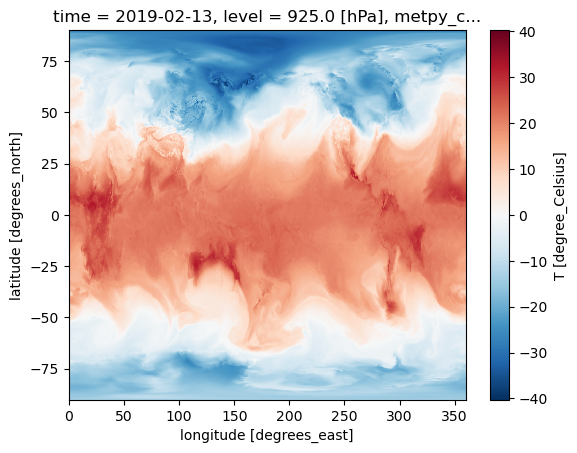

In [19]:
temperature_time_and_pressure_sliced_degC.plot()

#### What if we wanted to see how temperature changes with height?

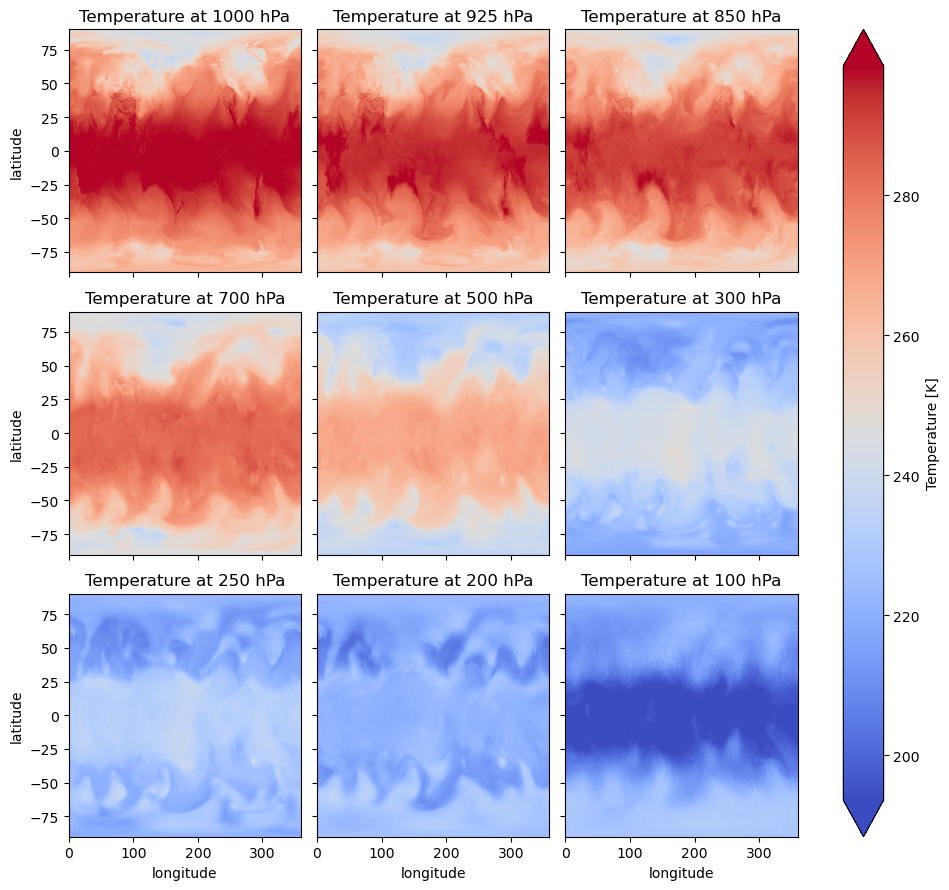

In [26]:
selected_levels = [1000, 925, 850, 700, 500, 300, 250, 200, 100] 
temperature_selected = temperature_time_sliced.sel(level=selected_levels)

g = temperature_selected.plot(x="longitude", y="latitude", col="level", col_wrap=3, robust=True, cmap='coolwarm')

for i, ax in enumerate(g.axs.flat):
    ax.set_title(f"Temperature at {selected_levels[i]} hPa")
    

#### Let's do the same for specific humidity!

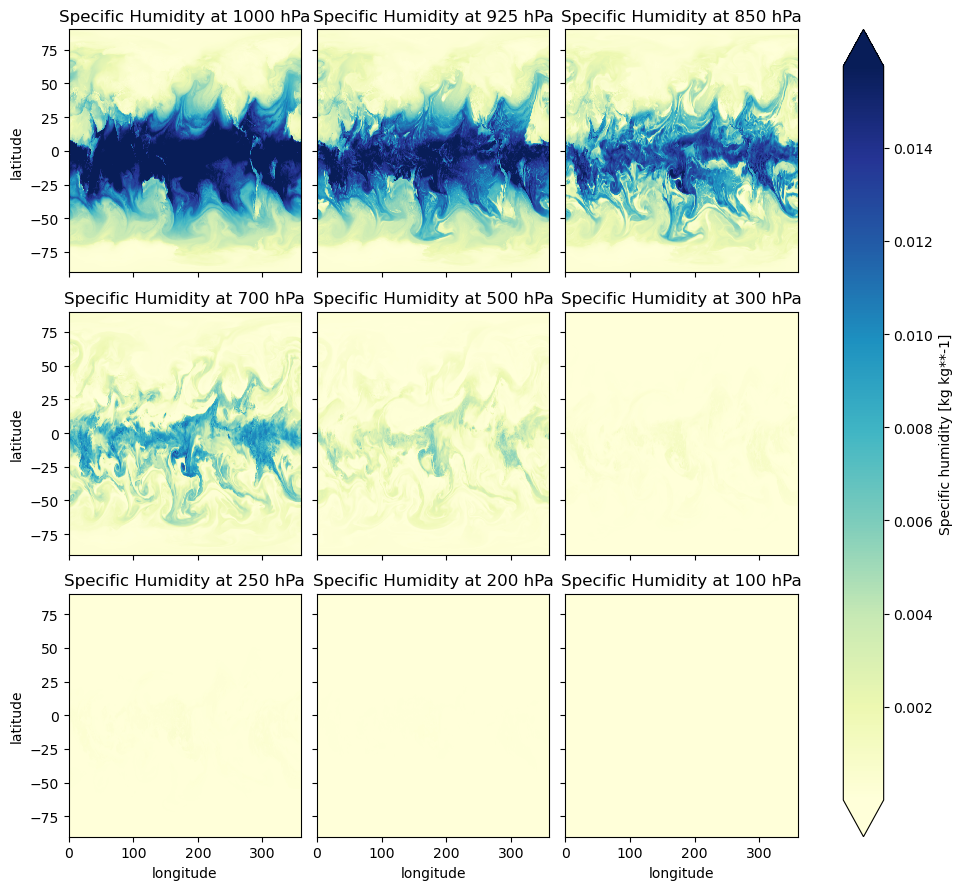

In [24]:
specific_humidity = ds_pl['Q'] # units: kg/kg

specific_humidity_time_sliced = specific_humidity.isel(time=0)

selected_levels = [1000, 925, 850, 700, 500, 300, 250, 200, 100] 
specific_humidity_selected = specific_humidity_time_sliced.sel(level=selected_levels)

g = specific_humidity_selected.plot(x="longitude", y="latitude", col="level", col_wrap=3, robust=True, cmap='YlGnBu')

for i, ax in enumerate(g.axs.flat):
    ax.set_title(f"Specific Humidity at {selected_levels[i]} hPa")
    